In [2]:
import os,sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
MODE_LIMIT = 81
RANDOM_STATE = 15


In [3]:
def load_data():
    print('Loading data ...')
    DIR_ROOT = os.path.join("D:\\", "LAA_STROKE", "data", "UW")
    DIR_LABELS = os.path.join(DIR_ROOT, 'labels')

    COMPONENT_SCORES = pd.read_csv(os.path.join(DIR_LABELS, 'statistical_shape_modeling', 'component_scores', '02-23.csv'))
    COMPONENT_SCORES = COMPONENT_SCORES.drop('Group', axis=1)

    with open(os.path.join(DIR_LABELS, 'statistical_shape_modeling', 'project_jsons', '02-23.swproj')) as file:
        FILE_NAMES_SSM = json.load(file)

    IDs = [int(os.path.split(FILE_NAMES_SSM['data'][x]['shape_1'])[-1].split(".")[0]) for x in range(len(FILE_NAMES_SSM['data']))]
    COMPONENT_SCORES['patient'] = IDs
    # print(COMPONENT_SCORES.shape)
    # print(IDs)
    STROKE = pd.read_csv(os.path.join(DIR_LABELS, 'chart_review', 'stroke_any.csv'))
    # print(STROKE.shape)
    df = pd.merge(COMPONENT_SCORES, STROKE, on='patient', how='inner')
    # print(df.head())
    df = df.drop('patient', axis=1)
    return df


def reduce_X(X=[]):
    from sklearn.decomposition import KernelPCA
    rbf_pca = KernelPCA(n_components=100,kernel='rbf',gamma=0.04)
    return rbf_pca.fit_transform(X)


Loading data ...


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P214,P215,P216,P217,P218,P219,P220,P221,P222,stroke
0,46.95070,-4.075850,6.68437,-6.085860,3.17733,-4.50813,-8.08652,-1.645970,-1.14456,2.75775,...,0.010890,0.042369,-0.027485,-0.167347,-0.093122,0.006736,0.041398,-0.098478,0.204871,False
1,-109.20800,-32.370300,13.16650,0.005269,-1.55896,29.20900,-13.06330,11.554600,14.00530,1.36825,...,-0.440339,0.038277,0.093675,-0.402497,0.546129,0.108169,-0.060100,-0.041517,0.009324,True
2,7.04946,0.804073,13.69220,6.700980,-7.24448,0.13314,5.75414,-0.552562,6.30897,1.75365,...,-0.063468,-0.012119,0.357274,-0.055837,-0.233477,-0.070539,-0.008295,-0.172560,0.302675,True


We are working with 223 components


C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
C:\Users\OITCOPIZARR0\AppData\Local\Temp\2\ipykernel_12556\3155917579.py:31: UserWarning: Fixed

['P48', 'P68', 'P76', 'P83', 'P131', 'P177', 'P185', 'P216']
We found 8 discriminant components
[0.5565355730400876, 0.16344010372608858, 0.20428282471412995, 0.43762798154581317, 0.7241538552703404, 0.11179634408572928, 0.09054453883310117, 0.08049952223884997, 0.42877343303841975, 0.25123122440083206, 0.22227862170117063, 0.912024309365993, 0.3505520630782605, 0.056526795687826877, 0.733448878695109, 0.7443818796679686, 0.8099154066699525, 0.8770133417856152, 0.724630921455288, 0.08487176768998564, 0.7024577461778885, 0.41848686016592274, 0.6007382920686537, 0.7609901801791037, 0.3718651877955996, 0.5511106374003105, 0.3467998320329192, 0.15968397437576398, 0.23530237884985483, 0.2795031051282579, 0.8626352627494098, 0.9802698416095228, 0.7474830552629677, 0.9348850282564684, 0.15853639443030199, 0.6724099082965687, 0.7531765902004417, 0.7663508412300569, 0.6485900900524801, 0.5748048437962154, 0.1484667840386791, 0.32675488673305975, 0.7960054929204429, 0.7712059019422697, 0.2301636

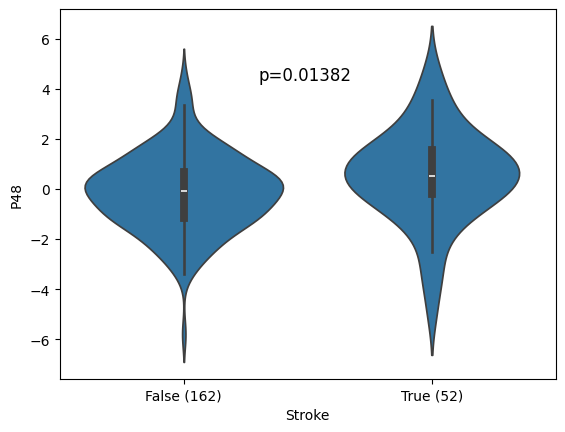

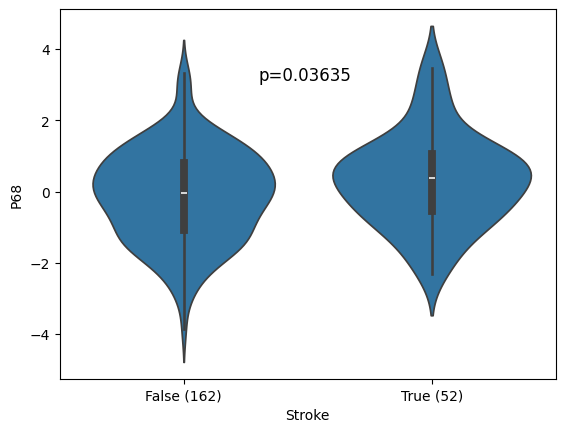

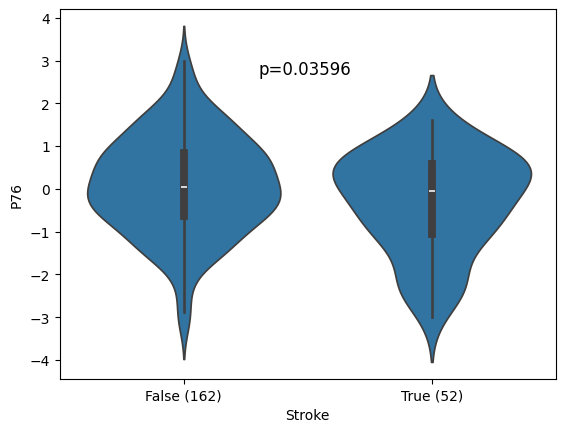

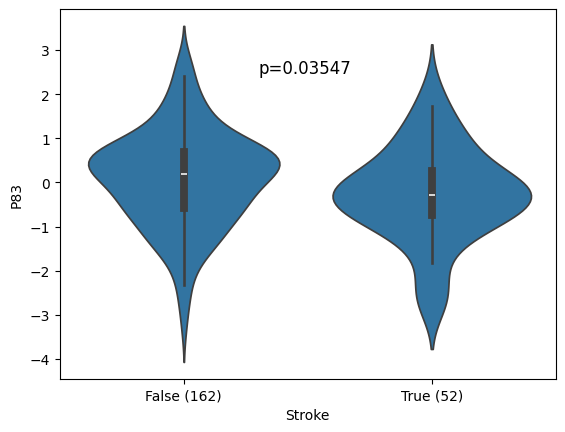

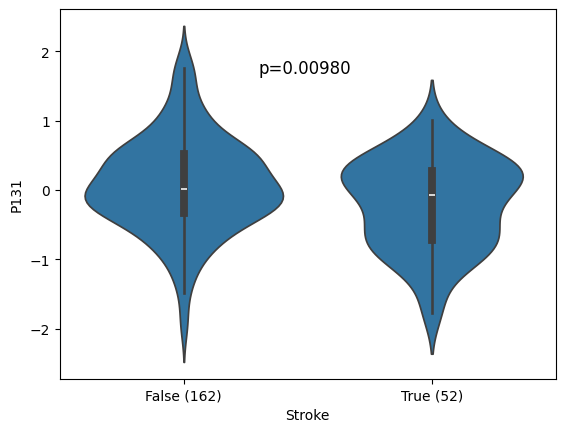

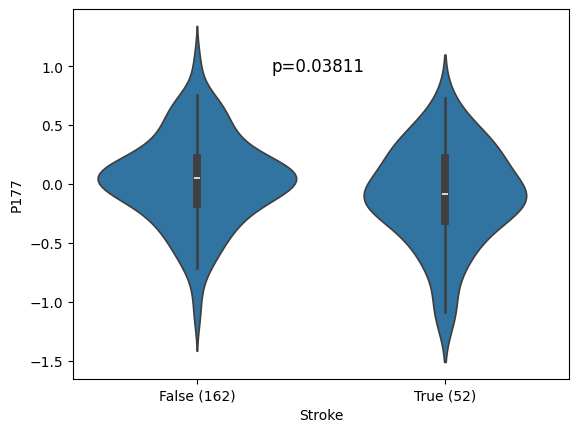

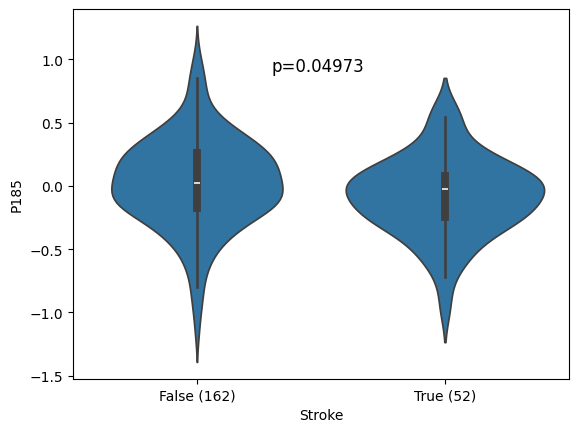

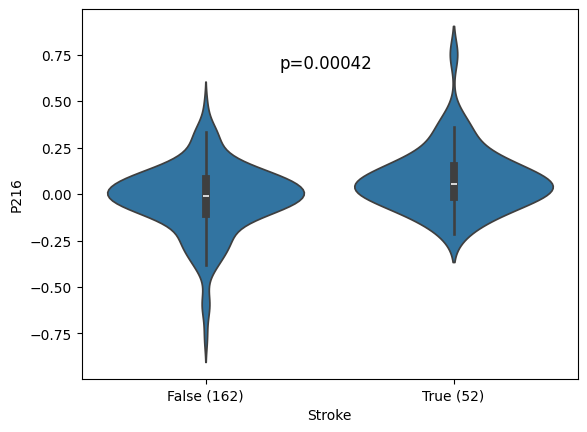

In [4]:

def main():
    # load the SSM features and stroke outcomes
    df = load_data()
    display(df.head(3))

    # number of components
    nb_comps = df.shape[1]-1
    print('We are working with {} components'.format(nb_comps))

    comps = list(df.drop('stroke', axis=1))

    stroke_counts = df['stroke'].value_counts()
    xticks = ['{0} ({1})'.format(i,c) for i,c in zip(stroke_counts.index,stroke_counts)]
    group1 = df[df['stroke']==stroke_counts.index[0]]
    group2 = df.loc[df['stroke']==stroke_counts.index[1]]
    
    # pvalue threshold: tried 0.05, 0.1, 0.2
    threshold = 0.05
    discriminant_comps = []
    pval_all = []
    for c in comps:

        ttest = ttest_ind(group1[c], group2[c])
        pval_all = pval_all + [ttest.pvalue]
        if ttest.pvalue < threshold:
            # display(c,ttest)
            discriminant_comps = discriminant_comps + [c]
            plt.figure()
            ax = sns.violinplot(data=df,x='stroke',y=c)    
            ax.set(xlabel='Stroke')
            ax.set_xticklabels(xticks)
            ax.text(0.3,0.9*np.max(df[c]),'p={0:0.5f}'.format(ttest.pvalue),fontsize=12)

    print(discriminant_comps)
    print('We found {} discriminant components'.format(len(discriminant_comps)))
    print(pval_all)

if __name__ == "__main__":
    main()
